# PART 1

# Reading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
#importing data
cellcycle_set = pd.read_excel("cell_cycle_set.xlsx")
cellcycle_df = pd.DataFrame(data=cellcycle_set)

In [4]:
cellcycle_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gene_Name        499 non-null    object 
 1   mean_RNA_G1      499 non-null    float64
 2   mean_RNA_S       499 non-null    float64
 3   mean_RNA_G2      499 non-null    float64
 4   mean_protein_G1  495 non-null    float64
 5   mean_protein_S   494 non-null    float64
 6   mean_protein_G2  493 non-null    float64
 7   GOBP             438 non-null    object 
 8   GOMF             466 non-null    object 
 9   GOCC             466 non-null    object 
dtypes: float64(6), object(4)
memory usage: 39.1+ KB


In [5]:
cellcycle_df.head()

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
0,ATG2A,9.006204,9.022302,9.129524,18.214767,14.898980,20.236780,NaN,binding;protein binding,NaN
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
4,ESYT2,11.336907,11.184317,11.284027,18.593760,19.151843,19.015813,NaN,NaN,cell part;integral to membrane;intrinsic to me...


# Processing

In [6]:
#deleting rows with NaN values.
cellcycle_df.dropna()

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...
...,...,...,...,...,...,...,...,...,...,...
494,ALDH1B1,11.115773,11.158333,11.434383,26.024680,23.865020,26.095450,alcohol metabolic process;biological regulatio...,aldehyde dehydrogenase (NAD) activity;aldehyde...,cell part;cytoplasmic part;cytosol;intracellul...
495,MRPL12,11.251870,11.351043,11.255327,26.739813,24.989527,27.104197,alcohol biosynthetic process;alcohol metabolic...,binding;nucleic acid binding;protein binding;R...,cell part;cytoplasmic part;integral to membran...
496,NQO1,13.013263,13.179313,13.048477,28.422773,25.464497,28.879273,biological regulation;biosynthetic process;cel...,binding;catalytic activity;coenzyme binding;co...,cell part;cytoplasmic part;cytosol;intracellul...
497,IFIT3,9.048456,8.599903,9.105025,23.592930,19.960053,23.599087,biological regulation;cell surface receptor li...,binding;protein binding,cell part;cytoplasmic part;cytosol;intracellul...


In [7]:
#mean of concentrations
cellcycle_df.mean(numeric_only=True)

mean_RNA_G1        11.114732
mean_RNA_S         11.086037
mean_RNA_G2        11.157963
mean_protein_G1    25.148932
mean_protein_S     22.640491
mean_protein_G2    25.391696
dtype: float64

In [8]:
#variance of concentrations
cellcycle_df.var(numeric_only=True)

mean_RNA_G1         2.242886
mean_RNA_S          2.247478
mean_RNA_G2         2.188892
mean_protein_G1    10.330618
mean_protein_S     10.268856
mean_protein_G2     9.828018
dtype: float64

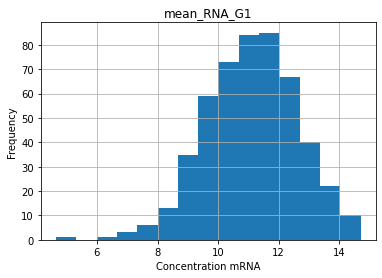

In [9]:
ax = cellcycle_df.hist(column='mean_RNA_G1', bins=15)
ax = ax[0]
for x in ax:
    x.set_xlabel("Concentration mRNA")
    x.set_ylabel("Frequency")

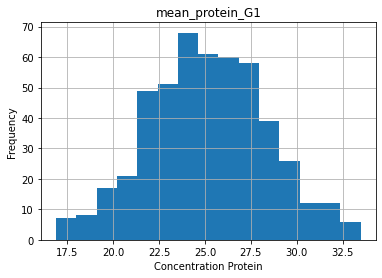

In [10]:
ax = cellcycle_df.hist(column='mean_protein_G1', bins=15)
ax = ax[0]
for x in ax:
    x.set_xlabel("Concentration Protein")
    x.set_ylabel("Frequency")

From the two histograms, it is clear to see predicting protein concentration from mRNA may be affected by the range of mRNA concentrations. Most values for G1 proteins appear to be between 23-27.5, however some deviate. This is explained by the variance in the data values.

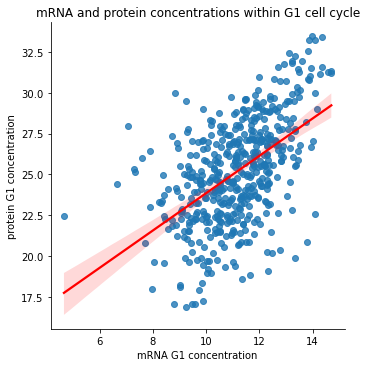

Correlation between mRNA G1 and protein G1 is:  0.53


In [11]:
sns.lmplot(x="mean_RNA_G1",y="mean_protein_G1", data=cellcycle_df, fit_reg=True, line_kws={"color": "red"})
corr = cellcycle_df["mean_RNA_G1"].corr(cellcycle_df["mean_protein_G1"])
plt.title("mRNA and protein concentrations within G1 cell cycle")
plt.xlabel("mRNA G1 concentration")
plt.ylabel("protein G1 concentration")
plt.show()

print("Correlation between mRNA G1 and protein G1 is: ", round(corr,2))

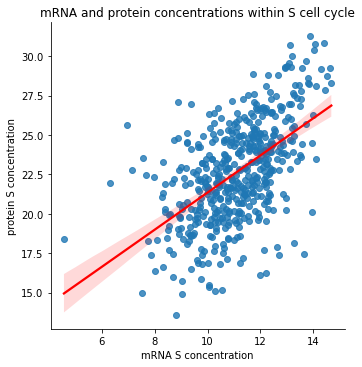

Correlation between mRNA S and protein S is:  0.55


In [12]:
sns.lmplot(x="mean_RNA_S",y="mean_protein_S", data=cellcycle_df, fit_reg=True, line_kws={"color": "red"})
corr = cellcycle_df["mean_RNA_S"].corr(cellcycle_df["mean_protein_S"])
plt.title("mRNA and protein concentrations within S cell cycle")
plt.xlabel("mRNA S concentration")
plt.ylabel("protein S concentration")
plt.show()

print("Correlation between mRNA S and protein S is: ", round(corr,2))

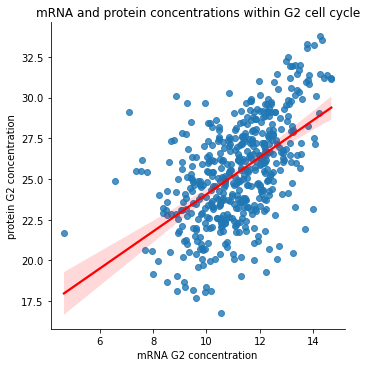

Correlation between mRNA G2 and protein G2 is:  0.54


In [13]:
sns.lmplot(x="mean_RNA_G2",y="mean_protein_G2", data=cellcycle_df, fit_reg=True, line_kws={"color": "red"})
corr = cellcycle_df["mean_RNA_G2"].corr(cellcycle_df["mean_protein_G2"])
plt.title("mRNA and protein concentrations within G2 cell cycle")
plt.xlabel("mRNA G2 concentration")
plt.ylabel("protein G2 concentration")
plt.show()

print("Correlation between mRNA G2 and protein G2 is: ", round(corr,2))

Correlation coefficients range between 0.53 to 0.55; These show only a moderate correlation between mRNA concentrations and protein concentrations. Predictions are likely to not be very accurate.

# PART 2

In [14]:
cellcycle_df["GOBP"] = cellcycle_df["GOBP"].fillna("")
GOBP_df = cellcycle_df[cellcycle_df["GOBP"].str.contains(r"\bcell cycle\b")]

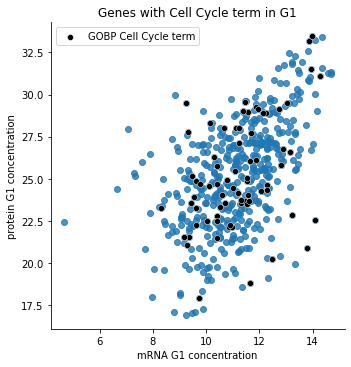

Correlation between mRNA G1 and protein G1 that underwent cell cycle process is:  0.42


In [15]:
sns.lmplot(x="mean_RNA_G1",y="mean_protein_G1", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_G1", y="mean_protein_G1", data=GOBP_df, color="black", label="GOBP Cell Cycle term")

plt.legend()
plt.title("Genes with Cell Cycle term in G1")
plt.xlabel("mRNA G1 concentration")
plt.ylabel("protein G1 concentration")
plt.show()

corr = GOBP_df["mean_RNA_G1"].corr(GOBP_df["mean_protein_G1"])
print("Correlation between mRNA G1 and protein G1 that underwent cell cycle process is: ", round(corr,2))

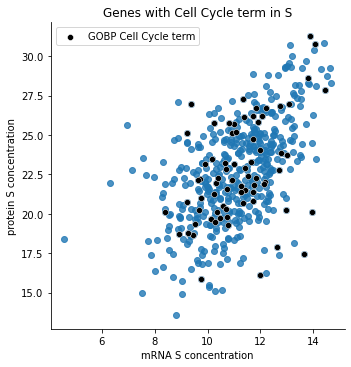

Correlation between mRNA S and protein S that underwent cell cycle process is:  0.42


In [16]:
sns.lmplot(x="mean_RNA_S",y="mean_protein_S", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_S", y="mean_protein_S", data=GOBP_df, color="black", label="GOBP Cell Cycle term")

plt.legend()
plt.title("Genes with Cell Cycle term in S")
plt.xlabel("mRNA S concentration")
plt.ylabel("protein S concentration")
plt.show()

corr = GOBP_df["mean_RNA_S"].corr(GOBP_df["mean_protein_S"])
print("Correlation between mRNA S and protein S that underwent cell cycle process is: ", round(corr,2))

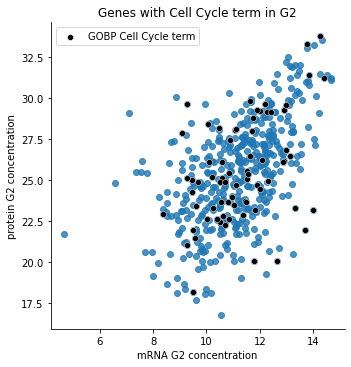

Correlation between mRNA G2 and protein G2 that underwent cell cycle process is:  0.44


In [17]:
sns.lmplot(x="mean_RNA_G2",y="mean_protein_G2", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_G2", y="mean_protein_G2", data=GOBP_df, color="black", label="GOBP Cell Cycle term")

plt.legend()
plt.title("Genes with Cell Cycle term in G2")
plt.xlabel("mRNA G2 concentration")
plt.ylabel("protein G2 concentration")
plt.show()

corr = GOBP_df["mean_RNA_G2"].corr(GOBP_df["mean_protein_G2"])
print("Correlation between mRNA G2 and protein G2 that underwent cell cycle process is: ", round(corr,2))

Correlations are fairly low for all stages of the cell cycle. The interphase part of the cell cycle depends on many parameters such as cell growth, damage, time delays, etc. It may be that extracting the data by 'cell cycle' as their process is far too vague, and does not consider factors such as localization of the DNA and the other parameters. 

In [18]:
cellcycle_df["GOCC"] = cellcycle_df["GOCC"].fillna("")
GOCC_df = cellcycle_df[cellcycle_df["GOCC"].str.contains("ribosome")]

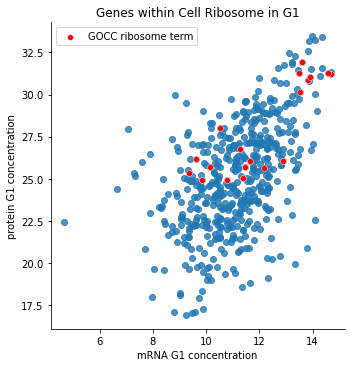

Correlation between mRNA G1 and protein G1 containing ribosomes is:  0.84


In [19]:
sns.lmplot(x="mean_RNA_G1",y="mean_protein_G1", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_G1", y="mean_protein_G1", data=GOCC_df, color="red", label="GOCC ribosome term")

plt.legend()
plt.title("Genes within Cell Ribosome in G1")
plt.xlabel("mRNA G1 concentration")
plt.ylabel("protein G1 concentration")
plt.show()

corr = GOCC_df["mean_RNA_G1"].corr(GOCC_df["mean_protein_G1"])
print("Correlation between mRNA G1 and protein G1 containing ribosomes is: ", round(corr,2))

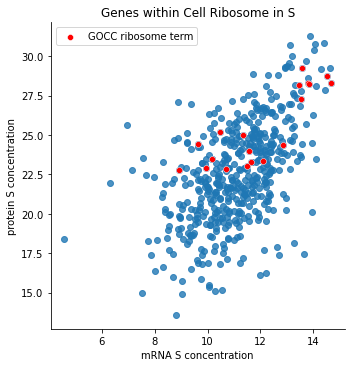

Correlation between mRNA S and protein S containing ribosomes is:  0.84


In [20]:
sns.lmplot(x="mean_RNA_S",y="mean_protein_S", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_S", y="mean_protein_S", data=GOCC_df, color="red", label="GOCC ribosome term")

plt.legend()
plt.title("Genes within Cell Ribosome in S")
plt.xlabel("mRNA S concentration")
plt.ylabel("protein S concentration")
plt.show()

corr = GOCC_df["mean_RNA_S"].corr(GOCC_df["mean_protein_S"])
print("Correlation between mRNA S and protein S containing ribosomes is: ", round(corr,2))

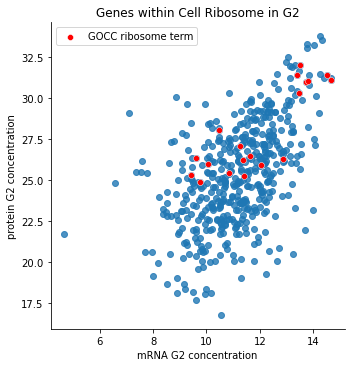

Correlation between mRNA G2 and protein G2 containing ribosomes is:  0.85


In [21]:
sns.lmplot(x="mean_RNA_G2",y="mean_protein_G2", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_G2", y="mean_protein_G2", data=GOCC_df, color="red", label="GOCC ribosome term")

plt.legend()
plt.title("Genes within Cell Ribosome in G2")
plt.xlabel("mRNA G2 concentration")
plt.ylabel("protein G2 concentration")
plt.show()

corr = GOCC_df["mean_RNA_G2"].corr(GOCC_df["mean_protein_G2"])
print("Correlation between mRNA G2 and protein G2 containing ribosomes is: ", round(corr,2))


All of the correlations for genes within the ribosome show to be relatively high >0.8. This implies that localization of genes may be important in determining protein concentrations from mRNA levels. Indeed in the cell cycle, the controlling mechanism is complex and depends on many parameters such as cell growth, DNA damage etc. It may be that in the ribosomes, these conditions are far more similar and therefore the correlations are higher.

In [22]:
from collections import Counter
GOBP_list = cellcycle_df["GOBP"].str.split(";")
flat_list = [item for sublist in GOBP_list for item in sublist]
occurances = Counter(flat_list)
#for item, count in occurances.items():
#    print(f"{item}: {count} occurrences")

There is clearly an extensive list of terms within the GOBP data column.
It can be difficult to guarantee no complex dependencies between processes involved,
and hence to determine an accurate relationship between mRNA and protein concentrations.

In [95]:
#Computing change in mRNA levels across cell cycles
mRNA_G1_S = cellcycle_df["mean_RNA_G1"] - cellcycle_df["mean_RNA_S"]
mRNA_S_G2 = cellcycle_df["mean_RNA_S"] - cellcycle_df["mean_RNA_G2"]
mRNA_G2_G1 = cellcycle_df["mean_RNA_G2"] - cellcycle_df["mean_RNA_G1"]

#Computing change in protein levels across cell cycles
protein_G1_S = cellcycle_df["mean_protein_G1"] - cellcycle_df["mean_protein_S"]
protein_S_G2 = cellcycle_df["mean_protein_S"] - cellcycle_df["mean_protein_G2"]
protein_G2_G1 = cellcycle_df["mean_protein_G2"] - cellcycle_df["mean_protein_G1"]

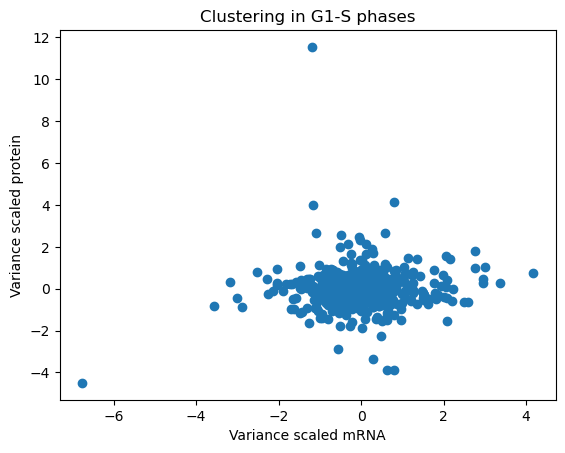

In [128]:
#Mean centering for mRNA G1 - S
mean_centered_data = mRNA_G1_S - mRNA_G1_S.mean()

#Variance scaling for mRNA G1 - S
variance_scaled_mrna_data = mean_centered_data / mRNA_G1_S.std()

#Mean centering for protein G1 - S
mean_centered_data = protein_G1_S - protein_G1_S.mean()

#Variance scaling for protein G1 - S
variance_scaled_protein_data = mean_centered_data / protein_G1_S.std()

plt.scatter(variance_scaled_mrna_data, variance_scaled_protein_data)
plt.title("Clustering in G1-S phases")
plt.xlabel("Variance scaled mRNA")
plt.ylabel("Variance scaled protein")
plt.show()

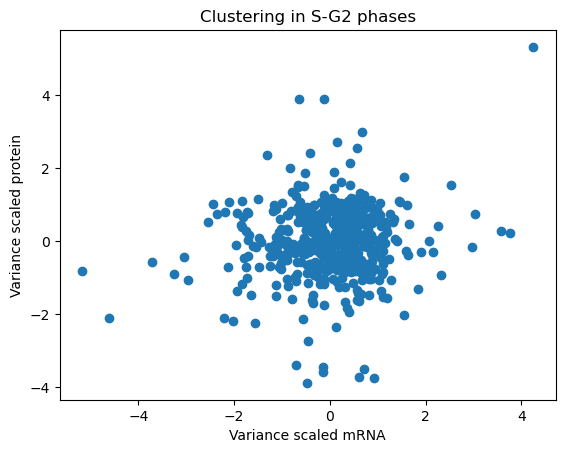

In [130]:
#Mean centering for mRNA S - G2
mean_centered_data = mRNA_S_G2 - mRNA_S_G2.mean()

#Variance scaling for mRNA S - G2
variance_scaled_mrna_data = mean_centered_data / mRNA_S_G2.std()

#Mean centering for protein S - G2
mean_centered_data = protein_S_G2 - protein_S_G2.mean()

#Variance scaling for protein S - G2
variance_scaled_protein_data = mean_centered_data / protein_S_G2.std()

plt.scatter(variance_scaled_mrna_data, variance_scaled_protein_data)
plt.title("Clustering in S-G2 phases")
plt.xlabel("Variance scaled mRNA")
plt.ylabel("Variance scaled protein")
plt.show()

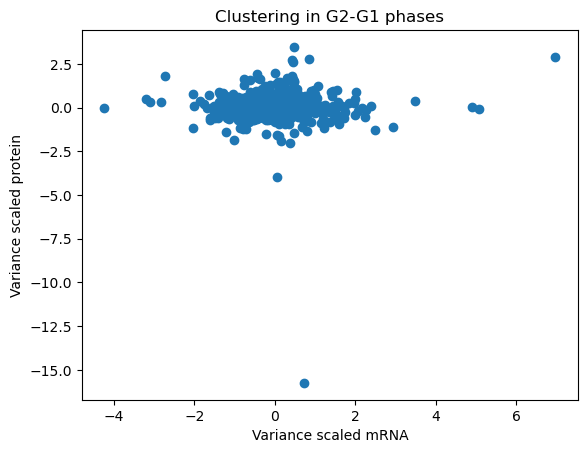

In [129]:
#Mean centering for mRNA G2 - G1
mean_centered_data = mRNA_G2_G1 - mRNA_G2_G1.mean()

#Variance scaling for mRNA G2 - G1
variance_scaled_mrna_data = mean_centered_data / mRNA_G2_G1.std()

#Mean centering for protein G2 - G1
mean_centered_data = protein_G2_G1 - protein_G2_G1.mean()

#Variance scaling for protein G2 - G1
variance_scaled_protein_data = mean_centered_data / protein_G2_G1.std()

plt.scatter(variance_scaled_mrna_data, variance_scaled_protein_data)
plt.title("Clustering in G2-G1 phases")
plt.xlabel("Variance scaled mRNA")
plt.ylabel("Variance scaled protein")
plt.show()

The correlations between stages of the cell cycle (G1, S and G2) are consistently quite low at 0.5. This implies that predicting protein concentration from mRNA levels can be a challenging task that is not entirely stage-specific. When only exploring gene data that is within the ribosome, it was shown that the correlation is far higher at 0.8. This implies that correlations may in fact be far more localization specific, or in particular, be more accurate within the ribosome than elsewhere in the cell. 

Clustering occurs between the phases of the cell cycle as shown by the plots above.

# A further look

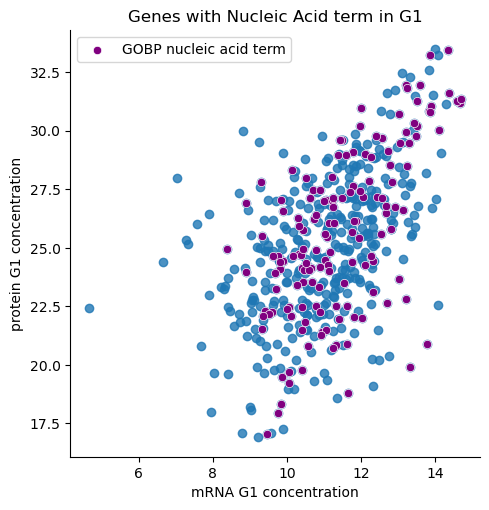

Correlation between mRNA G1 and protein G1 that underwent nucleic acid metabolic process is:  0.61


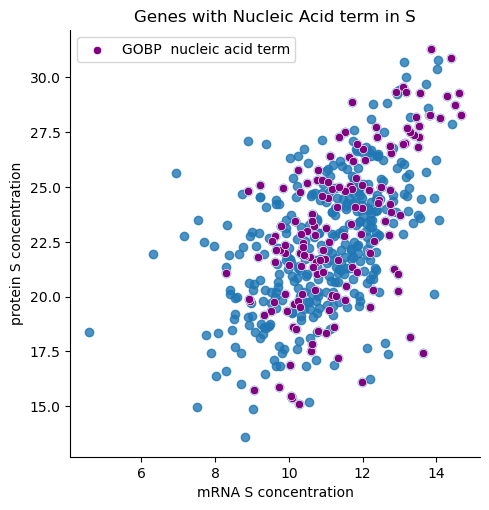

Correlation between mRNA S and protein S that underwent nucleic acid metabolic process is:  0.6


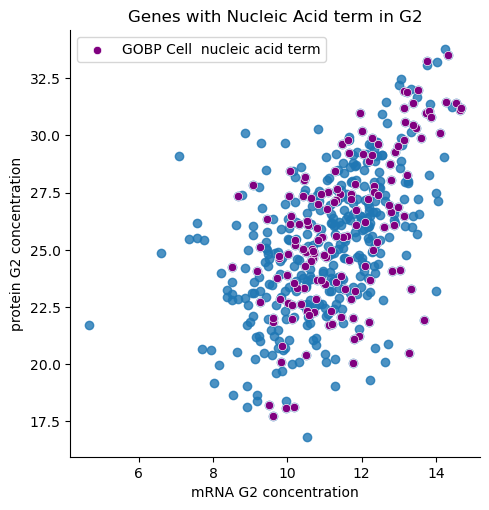

Correlation between mRNA G2 and protein G2 that underwent nucleic acid metabolic process is:  0.59


In [119]:
cellcycle_df["GOBP"] = cellcycle_df["GOBP"].fillna("")
GOBP_nucleic_df = cellcycle_df[cellcycle_df["GOBP"].str.contains("nucleic acid metabolic process")]

sns.lmplot(x="mean_RNA_G1",y="mean_protein_G1", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_G1", y="mean_protein_G1", data=GOBP_nucleic_df, color="purple", label="GOBP nucleic acid term")

plt.legend()
plt.title("Genes with Nucleic Acid term in G1")
plt.xlabel("mRNA G1 concentration")
plt.ylabel("protein G1 concentration")
plt.show()

corr = GOBP_nucleic_df["mean_RNA_G1"].corr(GOBP_nucleic_df["mean_protein_G1"])
print("Correlation between mRNA G1 and protein G1 that underwent nucleic acid metabolic process is: ", round(corr,2))
####
sns.lmplot(x="mean_RNA_S",y="mean_protein_S", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_S", y="mean_protein_S", data=GOBP_nucleic_df, color="purple", label="GOBP  nucleic acid term")

plt.legend()
plt.title("Genes with Nucleic Acid term in S")
plt.xlabel("mRNA S concentration")
plt.ylabel("protein S concentration")
plt.show()

corr = GOBP_nucleic_df["mean_RNA_S"].corr(GOBP_nucleic_df["mean_protein_S"])
print("Correlation between mRNA S and protein S that underwent nucleic acid metabolic process is: ", round(corr,2))
####
sns.lmplot(x="mean_RNA_G2",y="mean_protein_G2", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_G2", y="mean_protein_G2", data=GOBP_nucleic_df, color="purple", label="GOBP Cell  nucleic acid term")

plt.legend()
plt.title("Genes with Nucleic Acid term in G2")
plt.xlabel("mRNA G2 concentration")
plt.ylabel("protein G2 concentration")
plt.show()

corr = GOBP_nucleic_df["mean_RNA_G2"].corr(GOBP_nucleic_df["mean_protein_G2"])
print("Correlation between mRNA G2 and protein G2 that underwent nucleic acid metabolic process is: ", round(corr,2))

Genes with similar GO terms tend to also have similar correlations between phases of the cell cycle in predicting protein concentrations from mRNA levels

In [23]:
from collections import Counter
GOCC_list = cellcycle_df["GOCC"].str.split(";")
flat_list = [item for sublist in GOCC_list for item in sublist]
occurances = Counter(flat_list)
#for item, count in occurances.items():
#    print(f"{item}: {count} occurrences")

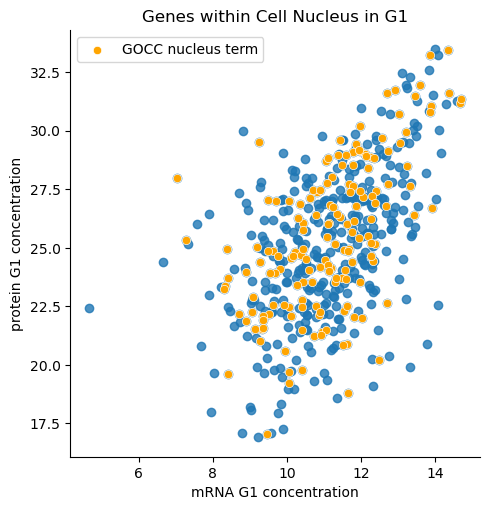

Correlation between mRNA G1 and protein G1 containing nucleus term is:  0.59


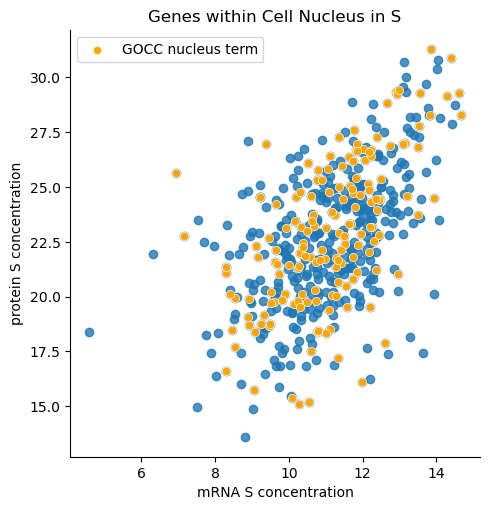

Correlation between mRNA S and protein S containing nucleus term is:  0.59


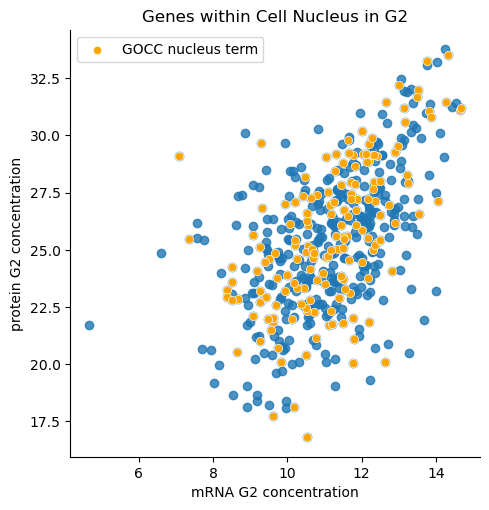

Correlation between mRNA G2 and protein G2 containing nucleus term is:  0.58


In [105]:
cellcycle_df["GOCC"] = cellcycle_df["GOCC"].fillna("")
GOCC_nucleus_df = cellcycle_df[cellcycle_df["GOCC"].str.contains("nucleus")]

sns.lmplot(x="mean_RNA_G1",y="mean_protein_G1", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_G1", y="mean_protein_G1", data=GOCC_nucleus_df, color="orange", label="GOCC nucleus term")

plt.legend()
plt.title("Genes within Cell Nucleus in G1")
plt.xlabel("mRNA G1 concentration")
plt.ylabel("protein G1 concentration")
plt.show()

corr = GOCC_nucleus_df["mean_RNA_G1"].corr(GOCC_nucleus_df["mean_protein_G1"])
print("Correlation between mRNA G1 and protein G1 containing nucleus term is: ", round(corr,2))
####
sns.lmplot(x="mean_RNA_S",y="mean_protein_S", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_S", y="mean_protein_S", data=GOCC_nucleus_df, color="orange", label="GOCC nucleus term")

plt.legend()
plt.title("Genes within Cell Nucleus in S")
plt.xlabel("mRNA S concentration")
plt.ylabel("protein S concentration")
plt.show()

corr = GOCC_nucleus_df["mean_RNA_S"].corr(GOCC_nucleus_df["mean_protein_S"])
print("Correlation between mRNA S and protein S containing nucleus term is: ", round(corr,2))
####
sns.lmplot(x="mean_RNA_G2",y="mean_protein_G2", data=cellcycle_df, fit_reg=False)
sns.scatterplot(x="mean_RNA_G2", y="mean_protein_G2", data=GOCC_nucleus_df, color="orange", label="GOCC nucleus term")

plt.legend()
plt.title("Genes within Cell Nucleus in G2")
plt.xlabel("mRNA G2 concentration")
plt.ylabel("protein G2 concentration")
plt.show()

corr = GOCC_nucleus_df["mean_RNA_G2"].corr(GOCC_nucleus_df["mean_protein_G2"])
print("Correlation between mRNA G2 and protein G2 containing nucleus term is: ", round(corr,2))

Similarily, genes with similar terms of localization tend to have similar correlations across all phases. It appears that in the nucleus, for which there are 162 genes, the correlation is fairly low. This implies that it is not accurate to predict protein concentration levels from mRNA levels from genes located here.

On a further look, it seems that localization of the genes has a big impact on the correlation of mRNA and protein levels. In the ribosome, the concentrations were far more aligned. Perhaps the nucleus has an increased complexity that makes this prediction unreliable.

In [113]:
#cellcycle_cleaned = cellcycle_df[["mean_RNA_G1","mean_protein_G1"]].dropna()
#sns.clustermap(cellcycle_cleaned[["mean_RNA_G1","mean_protein_G1"]], method="average", cmap="viridis")
#plt.show()

C:\Apps\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Apps\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


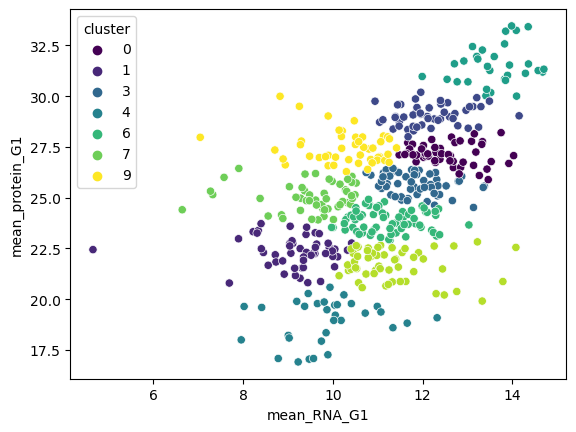

In [118]:
from sklearn.cluster import KMeans

data = cellcycle_df[["mean_RNA_G1", "mean_protein_G1"]].dropna()
kmeans = KMeans(n_clusters=10, random_state=42)
data["cluster"] = kmeans.fit_predict(data)
sns.scatterplot(x="mean_RNA_G1", y="mean_protein_G1", hue = "cluster", data=data, palette="viridis")
plt.show()